### Project 
Business Problem :

- Problem: The company faces inefficiencies in its bonus allocation process, leading to suboptimal use of resources and customer dissatisfaction.

- Goal: Maximize customer satisfaction and spending, while staying within a budget. Ensure that bonuses are allocated to the right customers at the right time to optimize retention and spending.

- Solution: Use machine learning to predict how much bonus each customer should receive, based on features like spending behavior, loyalty, and demographics.

In [157]:
########################################################################

#### About the Dataset

customer_id: 
- Unique identifier for each customer (integer, 1 to 10,000).

customer_name: 
- The name of the customer
age: 
- Age of the customer, generated using a normal distribution with a mean of 40 and a standard deviation of 15, clipped between 18 and 70.

income_level: 
- The income level of the customer, categorized as Low, Medium, or High, with the following probabilities: 40% Low, 40% Medium, and 20% High.

days_since_last_purchase: 
- Number of days since the customer made their most recent purchase. This is generated using a log-normal distribution to reflect a higher concentration of recent purchases.

active_days: 
- The number of days the customer was active during the past year (between 30 and 365 days).

total_number_of_purchases: 
- Total number of purchases made by the customer in the past year. Generated using a normal distribution and clipped between 100 and 5000.

total_amount_spent: 
- Total amount of money spent by the customer in the past year. This is generated using a log-normal distribution, reflecting varied spending patterns between customers, and clipped between 500 and 50,000.

avg_amount_spent: 
- Average amount spent per purchase, calculated as total_amount_spent / total_number_of_purchases.

days_since_first_purchase: 
- The number of days since the customer made their first purchase. This is generated randomly between 1 and 1000.

purchase_frequency: 
- The frequency of purchases made by the customer per year (between 0.5 and 2.0 purchases per year).

last_purchase_amount: 
- The amount spent by the customer in their most recent purchase. This is randomly generated between 50 and 5000.

seasonal_purchase_behavior: 
- A binary indicator (0 or 1) of whether the customer exhibits seasonal purchase behavior (1 = buys seasonally, 0 = does not).

emails_received: 
- The number of marketing or promotional emails the customer has received in the past year (between 1 and 20).

emails_opened: 
- The number of marketing emails the customer has opened in the past year (between 0 and 20).

promo_codes_used: 
- The number of promotional codes the customer has used in the past year (between 0 and 10).


refunds: 
- The number of refunds requested by the customer in the past year (between 0 and 5).


avg_discount: 
- The average discount percentage the customer has received in the past year (between 0% and 30%).


location: 
- The location of the customer, categorized as Urban, Suburban, or Rural.


bonus_amount_received: 
- A calculated bonus amount received by the customer, based on a percentage (0.05%) of the total amount spent, plus an additional amount based on the number of purchases. This introduces complexity and reflects customer activity.


## Step 1: Load the Dataset

In [158]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'customer_data_with_bonus_amount.csv'  # Replace with your file path
data = pd.read_csv(file_path)

In [159]:
##
# Display the first few rows
data.head()


,customer_id,customer_name,age,income_level,days_since_last_purchase,active_days,total_number_of_purchases,total_amount_spent,avg_amount_spent,days_since_first_purchase,purchase_frequency,last_purchase_amount,seasonal_purchase_behavior,emails_received,emails_opened,promo_codes_used,refunds,avg_discount,location,bonus_amount_received
0,1,Elizabeth Hart,47,Low,1,57,1546,4305.489853,2.784922,264,1.094361,2549.578960,0,14,18,5,3,14.644955,Suburban,33.072745
1,2,Andrew Smith,37,Low,1,133,100,50000.000000,500.000000,36,1.963092,260.602943,1,3,5,6,2,23.716789,Urban,27.000000
2,3,Jean Wilson,49,Low,4,125,406,1007.248669,2.480908,107,1.963200,250.259080,1,5,17,4,4,6.621062,Rural,8.623624
3,4,Paula Mays,62,Low,1,222,997,13529.063371,13.569773,25,0.687468,2703.937022,0,15,11,1,3,4.677589,Rural,26.704532
4,5,Andrea Alexander,36,Medium,2,154,641,500.000000,0.780031,424,1.219208,1798.340379,1,16,9,0,2,11.951850,Rural,13.070000


In [160]:
# Check basic information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 10000 non-null  int64  
 1   customer_name               10000 non-null  object 
 2   age                         10000 non-null  int64  
 3   income_level                10000 non-null  object 
 4   days_since_last_purchase    10000 non-null  int64  
 5   active_days                 10000 non-null  int64  
 6   total_number_of_purchases   10000 non-null  int64  
 7   total_amount_spent          10000 non-null  float64
 8   avg_amount_spent            10000 non-null  float64
 9   days_since_first_purchase   10000 non-null  int64  
 10  purchase_frequency          10000 non-null  float64
 11  last_purchase_amount        10000 non-null  float64
 12  seasonal_purchase_behavior  10000 non-null  int64  
 13  emails_received             1000

In [161]:
# Check for null values
data.isnull().sum()


customer_id                   0
customer_name                 0
age                           0
income_level                  0
days_since_last_purchase      0
active_days                   0
total_number_of_purchases     0
total_amount_spent            0
avg_amount_spent              0
days_since_first_purchase     0
purchase_frequency            0
last_purchase_amount          0
seasonal_purchase_behavior    0
emails_received               0
emails_opened                 0
promo_codes_used              0
refunds                       0
avg_discount                  0
location                      0
bonus_amount_received         0
dtype: int64

### Step 2: Exploratory Data Analysis (EDA)

In [162]:
# Summary statistics
data.describe()


,customer_id,age,days_since_last_purchase,active_days,total_number_of_purchases,total_amount_spent,avg_amount_spent,days_since_first_purchase,purchase_frequency,last_purchase_amount,seasonal_purchase_behavior,emails_received,emails_opened,promo_codes_used,refunds,avg_discount,bonus_amount_received
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,39.873200,4.070200,197.903500,1269.42790,26150.924991,91.585315,499.621800,1.249838,2514.344947,0.488700,10.501700,10.026100,4.941300,2.513400,14.906395,38.464020
std,2886.89568,13.751801,5.513847,97.342218,1162.39331,18920.270878,147.778485,288.252936,0.433014,1419.526922,0.499897,5.792215,6.051271,3.174281,1.695496,8.641262,25.109646
min,1.00000,18.000000,1.000000,30.000000,100.00000,500.000000,0.142694,1.000000,0.500263,52.416524,0.000000,1.000000,0.000000,0.000000,0.000000,0.000068,2.250000
25%,2500.75000,29.000000,1.000000,113.000000,100.00000,8043.776642,7.926109,246.000000,0.877542,1277.860429,0.000000,5.000000,5.000000,2.000000,1.000000,7.433871,19.326330
50%,5000.50000,39.000000,2.000000,198.000000,1016.00000,21911.979388,23.835838,505.000000,1.242512,2521.562927,0.000000,11.000000,10.000000,5.000000,3.000000,14.806416,33.391290
75%,7500.25000,50.000000,5.000000,283.000000,2023.25000,50000.000000,84.157111,747.000000,1.623574,3735.253422,1.000000,16.000000,15.000000,8.000000,4.000000,22.207351,54.809690
max,10000.00000,70.000000,140.000000,365.000000,5000.00000,50000.000000,500.000000,1000.000000,1.999830,4998.161446,1.000000,20.000000,20.000000,10.000000,5.000000,29.998074,125.000000


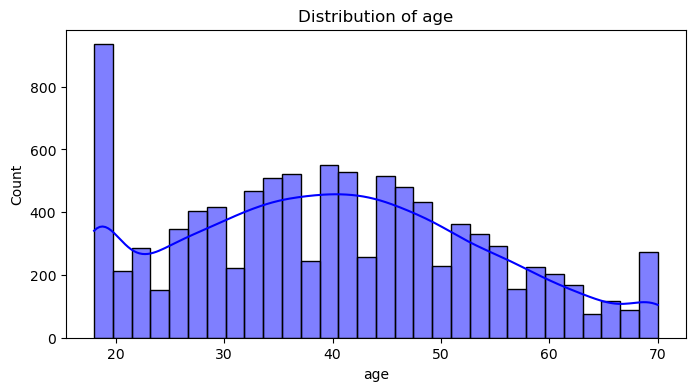

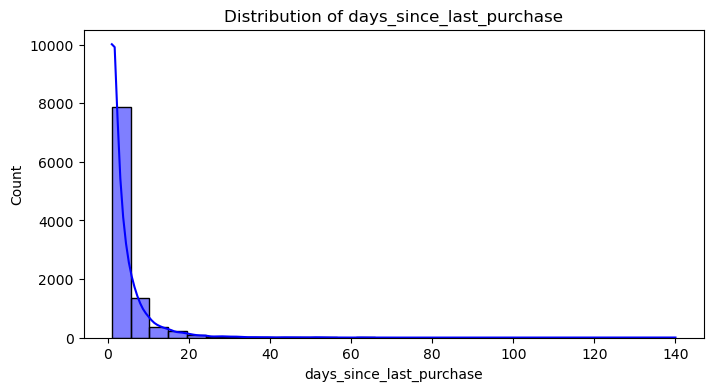

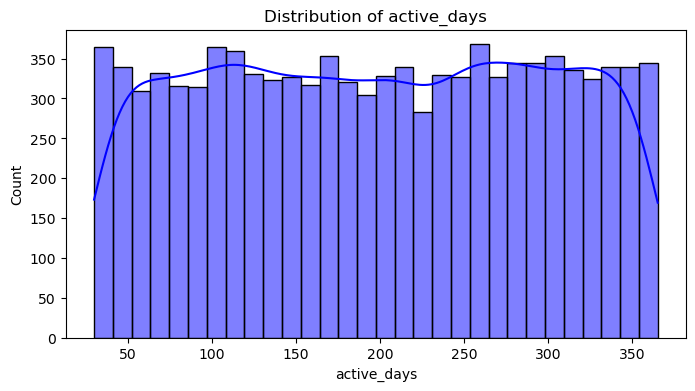

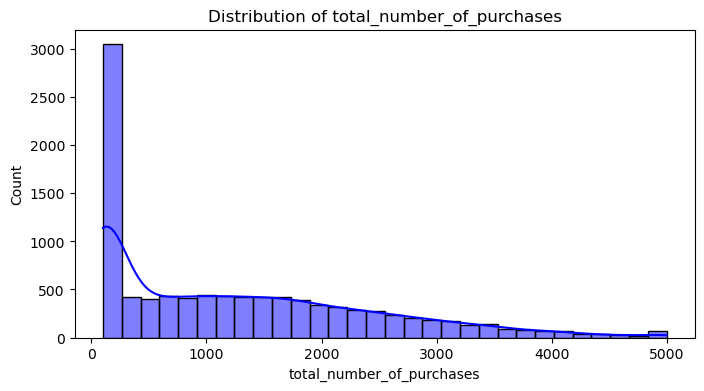

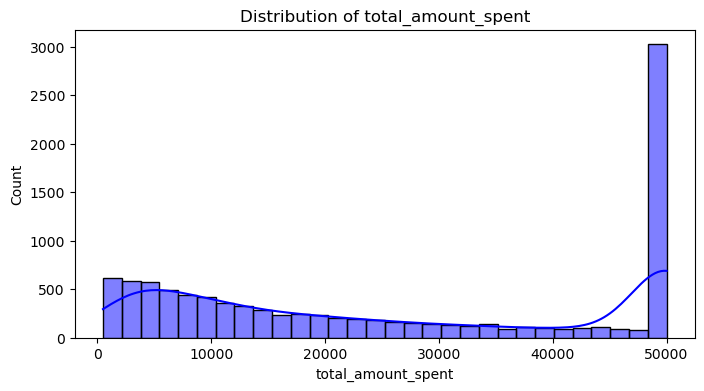

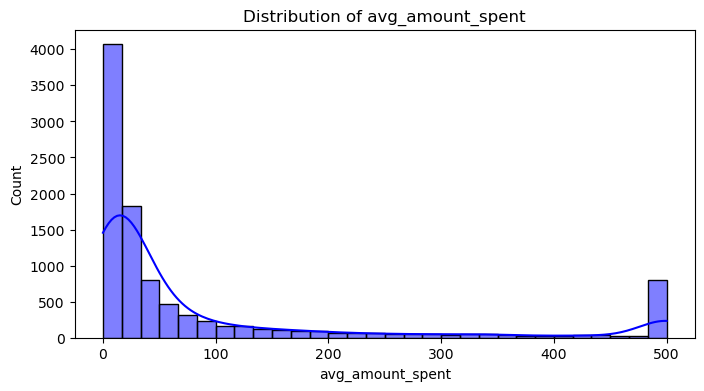

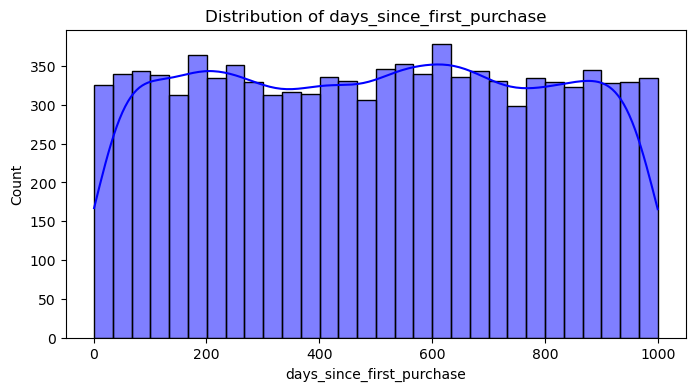

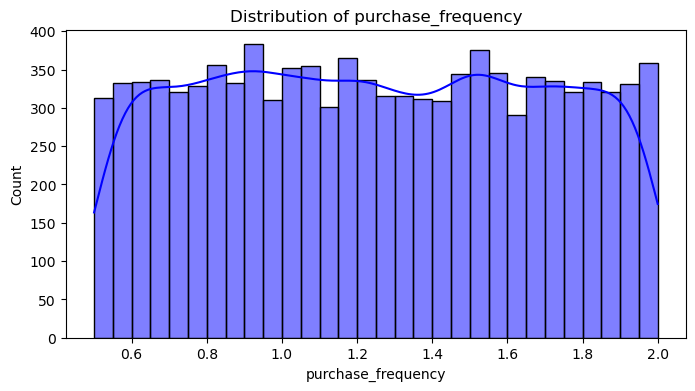

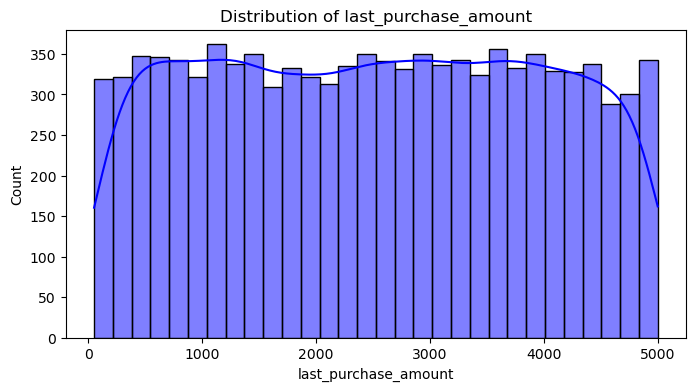

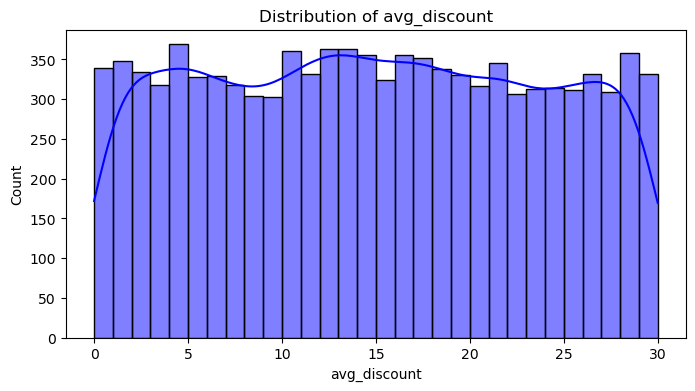

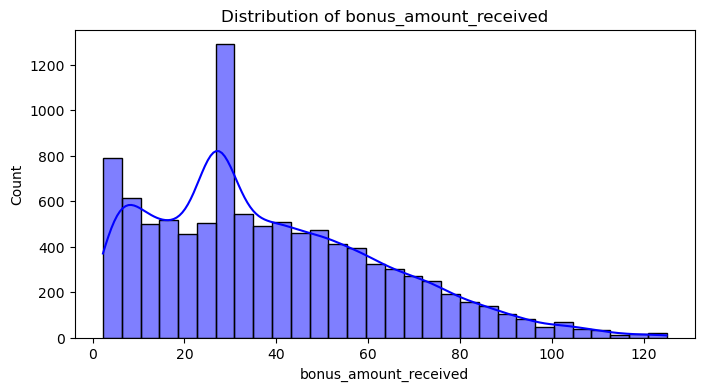

In [163]:
# Check the distribution of numerical features
numerical_columns = ['age', 'days_since_last_purchase', 'active_days',
                     'total_number_of_purchases', 'total_amount_spent',
                     'avg_amount_spent','days_since_first_purchase','purchase_frequency','last_purchase_amount','avg_discount','bonus_amount_received']

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.show()


### Step 3: Four Moments of Business Decision

- First Moment: Measures of Central Tendency

In [164]:
# Calculate mean, median, and mode
# First Moment: Measures of Central Tendency
central_tendency = {
    'Feature': numerical_columns,
    'Mean': [data[col].mean() for col in numerical_columns],
    'Median': [data[col].median() for col in numerical_columns],
    'Mode': [data[col].mode()[0] for col in numerical_columns]
}
central_tendency_df = pd.DataFrame(central_tendency)
central_tendency_df


,Feature,Mean,Median,Mode
0,age,39.873200,39.000000,18.000000
1,days_since_last_purchase,4.070200,2.000000,1.000000
2,active_days,197.903500,198.000000,110.000000
3,total_number_of_purchases,1269.427900,1016.000000,100.000000
4,total_amount_spent,26150.924991,21911.979388,50000.000000
5,avg_amount_spent,91.585315,23.835838,500.000000
6,days_since_first_purchase,499.621800,505.000000,944.000000
7,purchase_frequency,1.249838,1.242512,0.500263
8,last_purchase_amount,2514.344947,2521.562927,52.416524
9,avg_discount,14.906395,14.806416,0.000068


- Second Moment: Measures of Dispersion

In [165]:
# Calculate variance and standard deviation
dispersion = {
    'Feature': numerical_columns,
    'Variance': [data[col].var() for col in numerical_columns],
    'Standard Deviation': [data[col].std() for col in numerical_columns]
}
dispersion_df = pd.DataFrame(dispersion)
dispersion_df


,Feature,Variance,Standard Deviation
0,age,1.891120e+02,13.751801
1,days_since_last_purchase,3.040251e+01,5.513847
2,active_days,9.475507e+03,97.342218
3,total_number_of_purchases,1.351158e+06,1162.393310
4,total_amount_spent,3.579767e+08,18920.270878
5,avg_amount_spent,2.183848e+04,147.778485
6,days_since_first_purchase,8.308975e+04,288.252936
7,purchase_frequency,1.875009e-01,0.433014
8,last_purchase_amount,2.015057e+06,1419.526922
9,avg_discount,7.467140e+01,8.641262


- Third Moment: Skewness

In [166]:
# Calculate skewness
skewness = {col: data[col].skew() for col in numerical_columns}
print("Skewness of features:")
skewness

Skewness of features:


{'age': 0.20784732604131814,
 'days_since_last_purchase': 5.762244070323872,
 'active_days': -0.008807259516229578,
 'total_number_of_purchases': 0.8702670970159421,
 'total_amount_spent': 0.15403745408681802,
 'avg_amount_spent': 1.9588364576741752,
 'days_since_first_purchase': 0.0006467989981448367,
 'purchase_frequency': 0.01499874756623957,
 'last_purchase_amount': 0.006108018114829857,
 'avg_discount': 0.01482430351257531,
 'bonus_amount_received': 0.6973853752369608}

In [167]:
## Fourth Moment: Kurtosis

In [168]:
# Calculate kurtosis
kurtosis_values = {col: data[col].kurt() for col in numerical_columns}
print("Kurtosis of features:")
kurtosis_values


Kurtosis of features:


{'age': -0.7129663406206403,
 'days_since_last_purchase': 72.88337566704398,
 'active_days': -1.216164748070211,
 'total_number_of_purchases': 0.01667820940418885,
 'total_amount_spent': -1.627512178084832,
 'avg_amount_spent': 2.4610821577337547,
 'days_since_first_purchase': -1.1969334559578904,
 'purchase_frequency': -1.1976465579114537,
 'last_purchase_amount': -1.1951747436511093,
 'avg_discount': -1.174707107226907,
 'bonus_amount_received': -0.03340091106311327}

### Step 4: Visualization

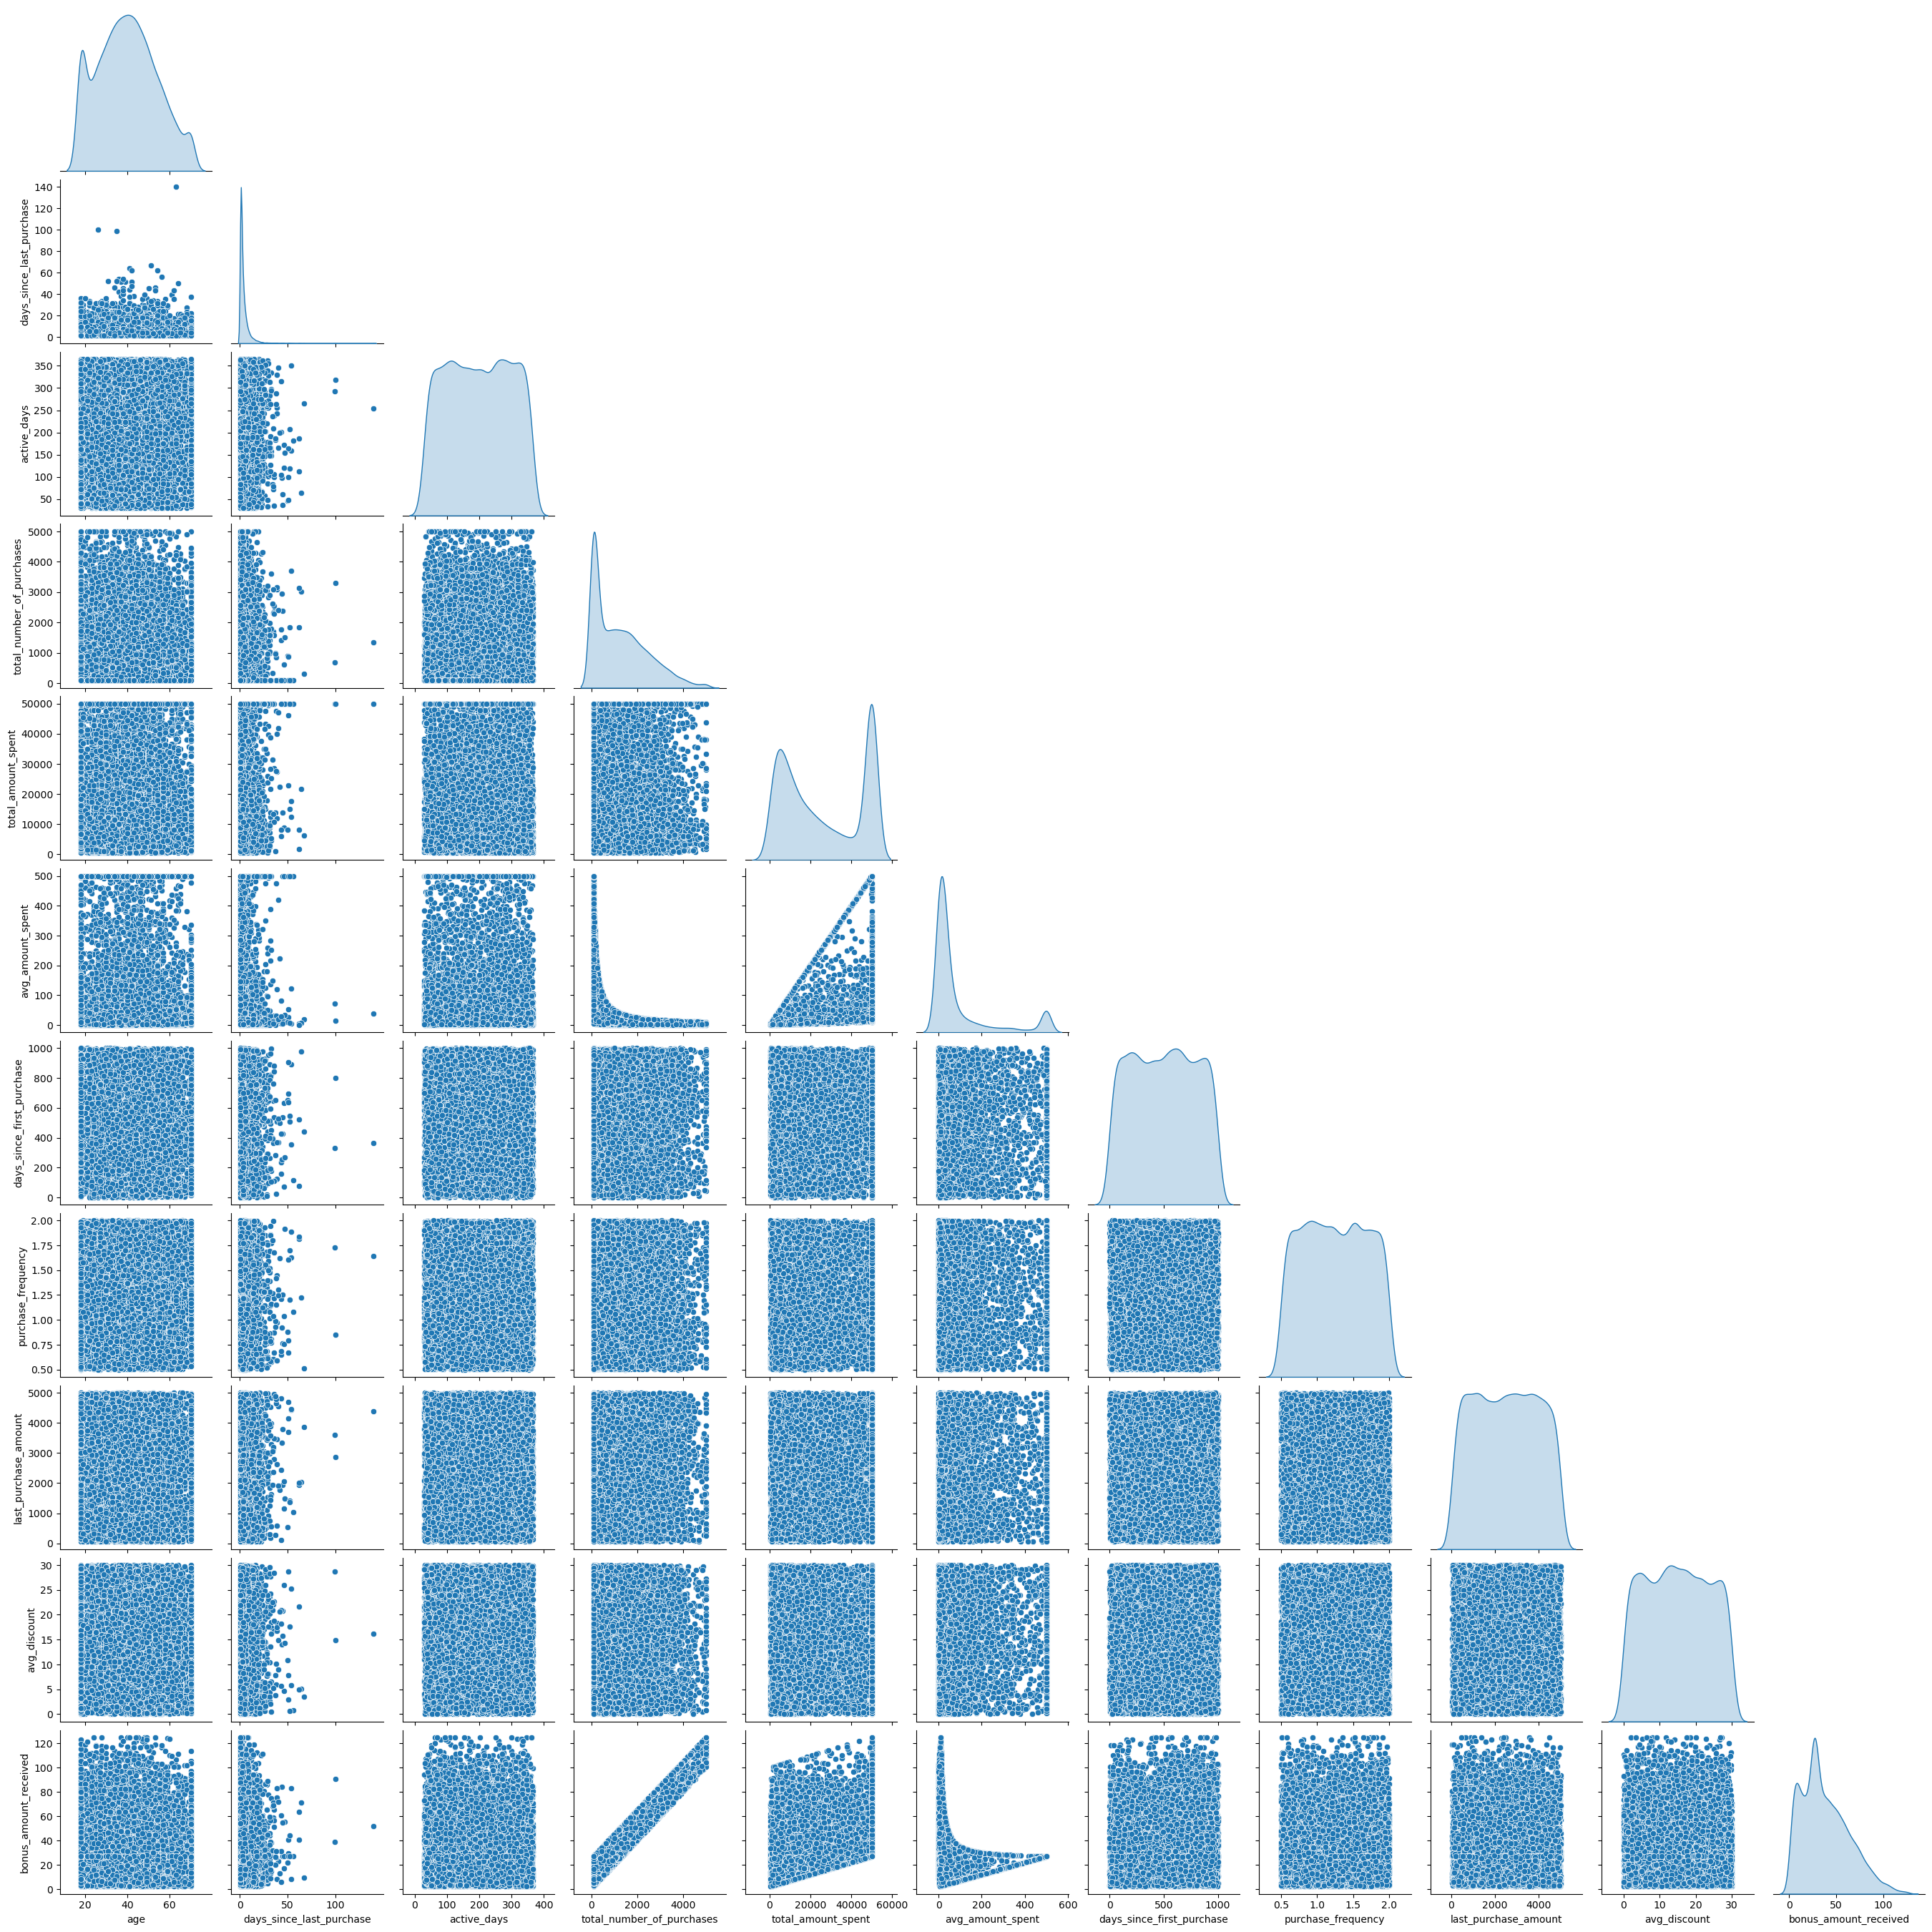

In [169]:
# Pairplot to check relationships
sns.pairplot(data[numerical_columns], diag_kind='kde', corner=True)

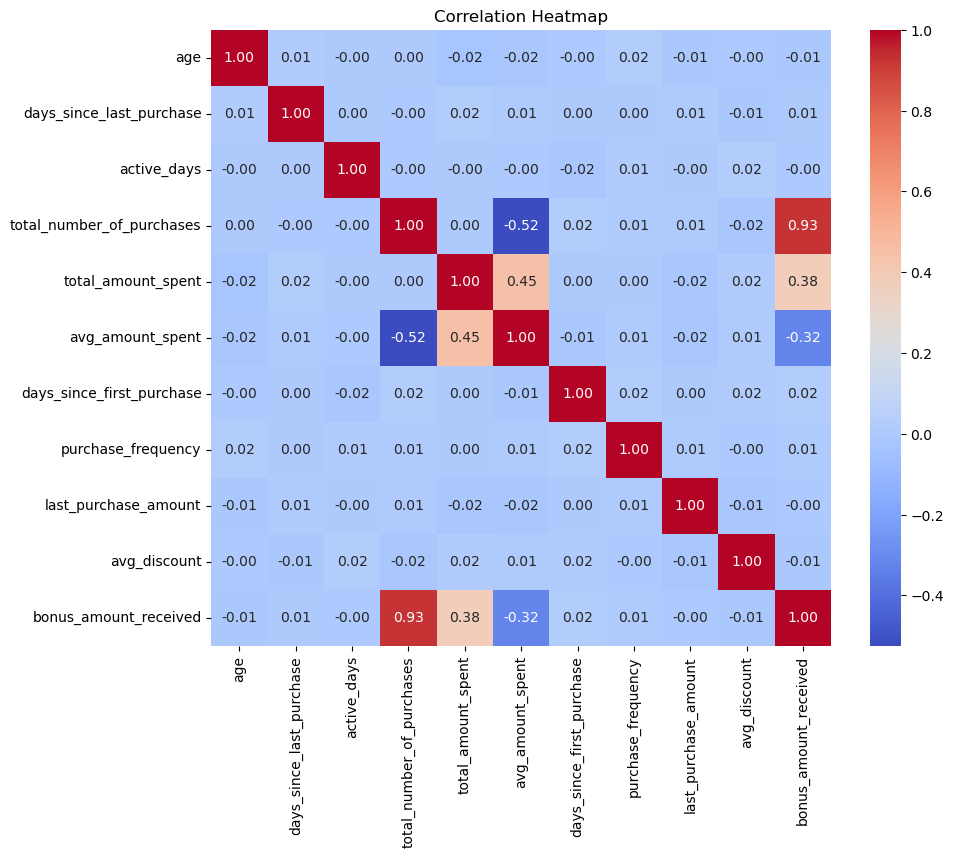

In [170]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

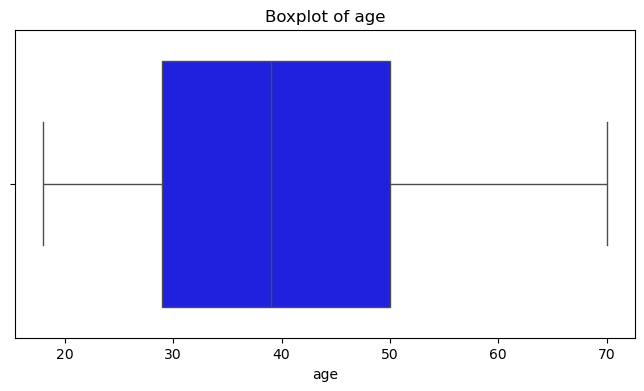

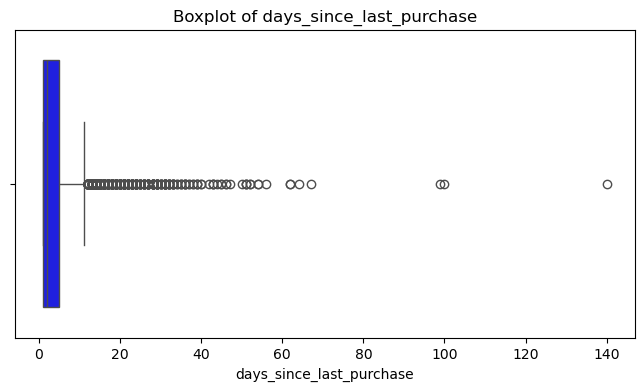

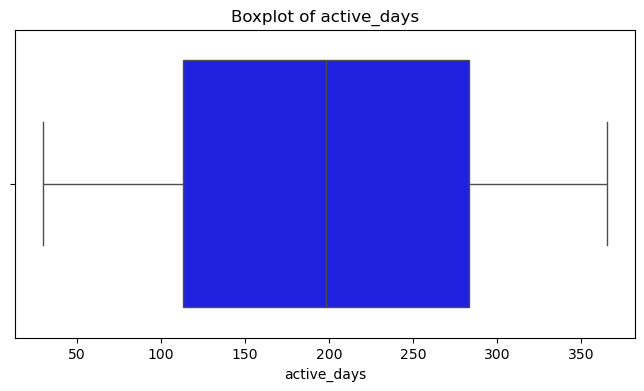

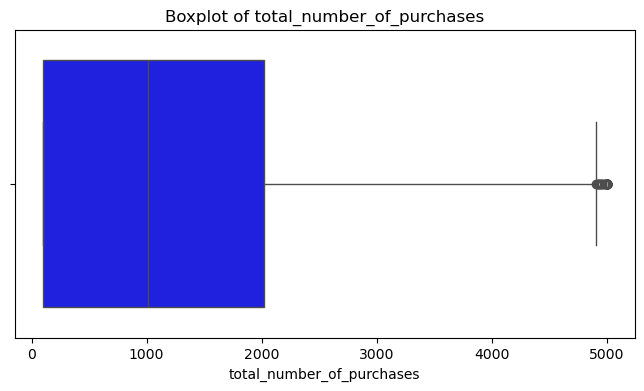

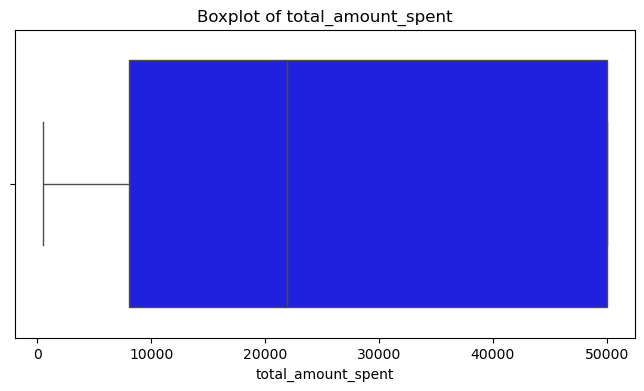

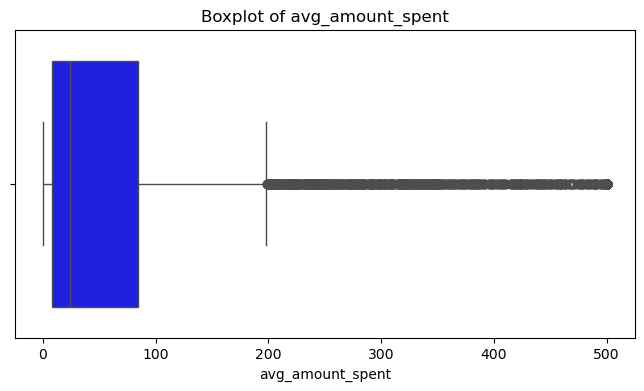

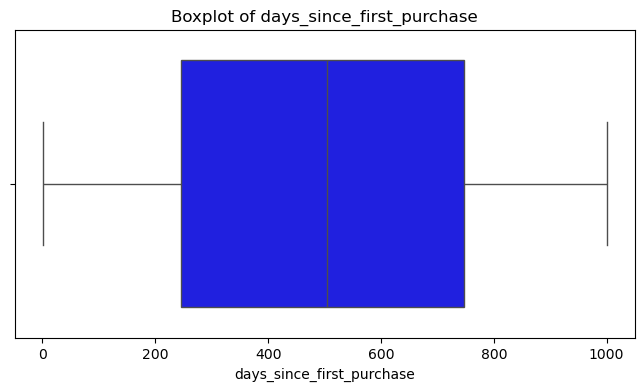

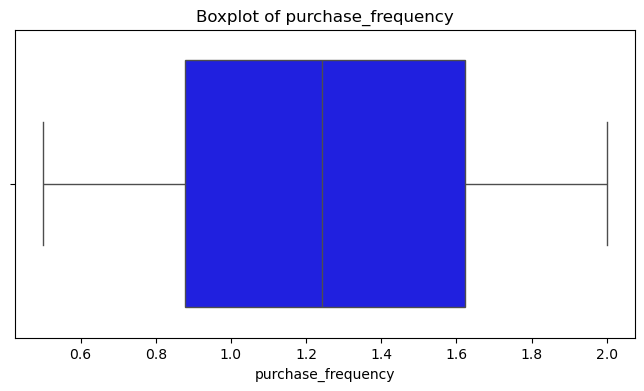

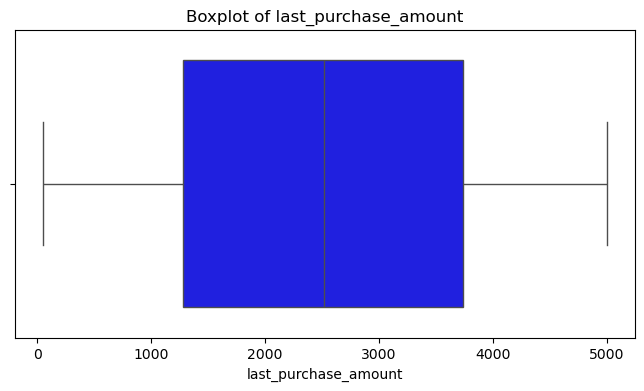

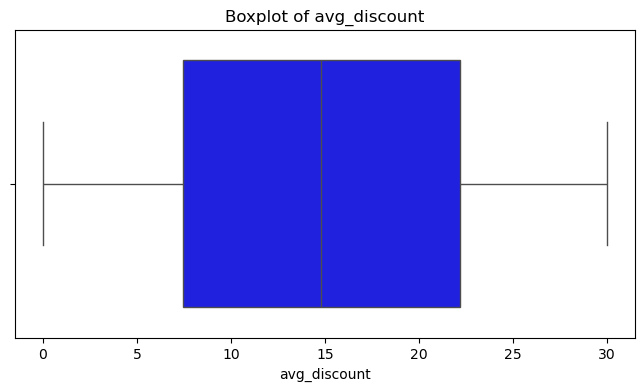

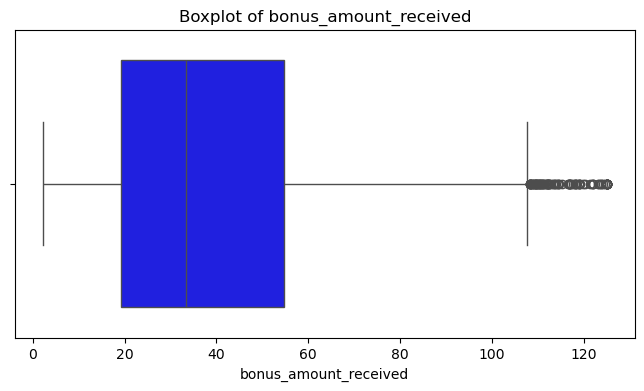

In [171]:
#Boxplot :- A boxplot provides a summary of the distribution of a dataset, showing the median, quartiles, and any potential outliers

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column], color='blue')
    plt.title(f"Boxplot of {column}")
    plt.show()


### Step 5: Regression Model Building

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [173]:
# Imports for evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Description of each metric:
# Mean Absolute Error (MAE)
# Mean Squared Error (MSE)
# R-squared (R2 Score)


- Splitting Data

In [174]:


# Assuming 'data' is your DataFrame containing all the features and target variable
# Define features (X) and target (y)
X = data[['age', 'income_level', 'days_since_last_purchase', 'active_days', 
          'total_number_of_purchases', 'total_amount_spent', 'avg_amount_spent', 'location']]
y = data['bonus_amount_received']

# OneHotEncoding for categorical columns ('income_level' and 'location')
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Updated argument
categorical_cols = ['income_level', 'location']

# Fit and transform on the categorical columns
encoded_categorical = encoder.fit_transform(X[categorical_cols])

# Convert the encoded categorical data into a DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from X and concatenate the encoded ones
X_encoded = X.drop(categorical_cols, axis=1).reset_index(drop=True)
X_final = pd.concat([X_encoded, encoded_categorical_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42),
    'AdaBoost Regressor': AdaBoostRegressor(random_state=42)
}



### Train vs. Test Metrics

In [175]:
# Initialize dictionaries to store metrics
train_results = []
test_results = []

# Evaluate models on both train and test datasets
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Metrics for training data
    train_mae = mean_absolute_error(y_train, train_pred)
    train_mse = mean_squared_error(y_train, train_pred)
    train_rmse = train_mse ** 0.5
    train_r2 = r2_score(y_train, train_pred)
    
    # Metrics for testing data
    test_mae = mean_absolute_error(y_test, test_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    test_rmse = test_mse ** 0.5
    test_r2 = r2_score(y_test, test_pred)
    
    # Store results
    train_results.append({'Model': name, 'MAE': train_mae, 'MSE': train_mse, 'RMSE': train_rmse, 'R2 Score': train_r2})
    test_results.append({'Model': name, 'MAE': test_mae, 'MSE': test_mse, 'RMSE': test_rmse, 'R2 Score': test_r2})

# Convert results to DataFrames
train_df = pd.DataFrame(train_results)
test_df = pd.DataFrame(test_results)

# Sort DataFrames for better readability (optional)
train_df = train_df.sort_values(by="R2 Score", ascending=False).reset_index(drop=True)
test_df = test_df.sort_values(by="R2 Score", ascending=False).reset_index(drop=True)




In [176]:
# Display results
print("Training Metrics:")
train_df



Training Metrics:


,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,3.666568e-12,1.590649e-23,3.988294e-12,1.000000
1,Decision Tree,1.332268e-18,4.733165e-33,6.879800e-17,1.000000
2,Random Forest,6.148671e-02,1.392394e-02,1.179997e-01,0.999978
3,XGBoost Regressor,1.371951e-01,3.965099e-02,1.991256e-01,0.999937
4,Gradient Boosting,3.484008e-01,2.397691e-01,4.896622e-01,0.999620
5,AdaBoost Regressor,3.219934e+00,1.611707e+01,4.014607e+00,0.974473


In [177]:
print("\nTesting Metrics:")
test_df


Testing Metrics:


,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,3.672795e-12,1.593608e-23,3.992003e-12,1.000000
1,Random Forest,1.561177e-01,8.020230e-02,2.832001e-01,0.999872
2,XGBoost Regressor,2.778497e-01,1.970501e-01,4.439032e-01,0.999685
3,Gradient Boosting,3.816797e-01,2.894665e-01,5.380209e-01,0.999537
4,Decision Tree,3.787206e-01,4.974684e-01,7.053144e-01,0.999205
5,AdaBoost Regressor,3.266157e+00,1.674231e+01,4.091737e+00,0.973240


In [178]:
##########################################################################################################3

### **Why Random Forest is Better Here**

- 1.Handles Non-Linearity
    - If there are any non-linear interactions between features and the target variable (even minor ones), Random Forest will capture them effectively.

- 2.Generalization
    - Random Forest uses bagging (bootstrap aggregation) to reduce overfitting, making it better suited for datasets with complex structures or noise.

- 3.Feature Importance
    - Random Forest provides insights into which features are most important for predicting the target, which can help guide business decisions.

- 4.Excellent Performance
    - Your testing metrics for Random Forest show near-perfect performance with minimal errors. 
    - It performs slightly better than other models, including Linear Regression.

- 5.Resilient to Outliers and Missing Data:
    - Unlike Linear Regression, Random Forest can handle datasets with irregularities like outliers or minor data imperfections.    

In [179]:
#################################################################################################


### **When Random Forest Might Be a Better Fit**

- Real-world Scenarios: 
    - Retail and customer loyalty problems often have non-linear patterns that Random Forest captures effectively.

- Predictive Power: 
    - If the focus is on accurate predictions and the model doesn’t need to be overly interpretable, Random Forest is ideal.

- Scalability: 
    - While Random Forest is more computationally intensive than Linear Regression, it’s still manageable for most datasets.

### Save the Random Forest model in a pickle file

In [187]:
import pickle

# Assuming `rf_model` is your trained model and `encoder` is your OneHotEncoder
# Save the model and encoder to pickle files
with  open('encoder.pkl', 'wb') as encoder_file:
    pickle.dump(encoder, encoder_file)

print("Model and encoder saved!")


Model and encoder saved!


In [183]:
import pickle

# Assuming `rf_model` is your trained Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Fit your model (replace X_train and y_train with your data)

# Saving the model to a pickle file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Model saved as 'random_forest_model.pkl'")


Model saved as 'random_forest_model.pkl'


### Loading the saved model:

In [184]:
# Loading the saved model
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use `loaded_model` for predictions
predictions = loaded_model.predict(X_test)


In [185]:
predictions 

array([10.49601309,  4.53612607, 50.88046046, ..., 12.68078877,
       67.51774218, 27.        ])

In [186]:
# Optionally, print some predictions to verify
print(predictions[:10])  # Print the first 10 predictions

[10.49601309  4.53612607 50.88046046  9.01481846  6.35533532 47.21207058
 12.27561215  8.70357076 70.01664655 10.97585721]


In [ ]:
##############################################################################################

### What to Keep in Mind
- Interpretability:
    - Random Forest is less interpretable than Linear Regression. If stakeholders need simple explanations, this might be a drawback.
- Overfitting Risk:
    - Random Forest usually prevents overfitting, but tuning parameters like the number of trees (n_estimators) and depth (max_depth) is crucial.

In [ ]:
############################################################################

###  Hyperparameter Tuning Step

### Set up Parameter Grid: 
Define the hyperparameters that you want to tune. The following parameters are commonly tuned for Random Forest:

- n_estimators:
    - The number of trees in the forest.
- max_depth: 
    - The maximum depth of the tree.
- min_samples_split: 
    - The minimum number of samples required to split a node.
- min_samples_leaf: 
    - The minimum number of samples required to be at a leaf node.
- max_features: 
    - The number of features to consider when looking for the best split.

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Create the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],   # Depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum samples to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}


#### Set up GridSearchCV: 
- Use GridSearchCV to search over the parameter grid and find the best hyperparameters.

In [ ]:
# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')


- Fit the Model: Now, fit the model on your training data using GridSearchCV to find the best hyperparameters.

In [ ]:
# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Display the best parameters found
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


KeyboardInterrupt: 

Evaluate the Best Model: 
- After finding the best parameters, you can evaluate the performance of the tuned model on the test data.

In [ ]:
# Predict using the best model found
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


Feature Importance: 
- After tuning, you can check which features are most important for your predictions

In [ ]:
# Get feature importances from the best model
importances = best_model.feature_importances_

# Sort the features by importance
feature_importance = pd.DataFrame(importances, index=X_train.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance)
